<a href="https://colab.research.google.com/github/DSabarish/netflix_data_analysis/blob/main/Netflix_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing	libraries	for	our	purpose
import pandas	as	pd
import numpy	as	np
import matplotlib.pyplot	as	plt
import seaborn	as	sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df.info()


# Observations
# len = 8807 entries
# type convertion requried for --> [date_added to dt, release_year to dt, ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

# Remove leading and trailing spaces, extract only the date part, and convert to datetime format
df["date_added"] = (df["date_added"]
                    .str.strip()
                    .apply(pd.to_datetime)
                    .dt.date
                    .apply(pd.to_datetime)
                    )
# df["date_added"].head(3)

df["date_added"].describe()

count                             8797
mean     2019-05-17 05:59:08.436967168
min                2008-01-01 00:00:00
25%                2018-04-06 00:00:00
50%                2019-07-02 00:00:00
75%                2020-08-19 00:00:00
max                2021-09-25 00:00:00
Name: date_added, dtype: object

In [ ]:
# Convert "release_year" column to datetime format with the middle of the year
df["release_year"] = pd.to_datetime(df["release_year"].astype(str) + '-07-01')
# df["release_year"].head(3)

df["release_year"].describe()


count                             8807
mean     2014-09-04 23:07:11.247870976
min                1925-07-01 00:00:00
25%                2013-07-01 00:00:00
50%                2017-07-01 00:00:00
75%                2019-07-01 00:00:00
max                2021-07-01 00:00:00
Name: release_year, dtype: object

In [ ]:
df[df["release_year"] == df["release_year"].min()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925-07-01,TV-14,1 Season,TV Shows,This collection restores films from women who ...


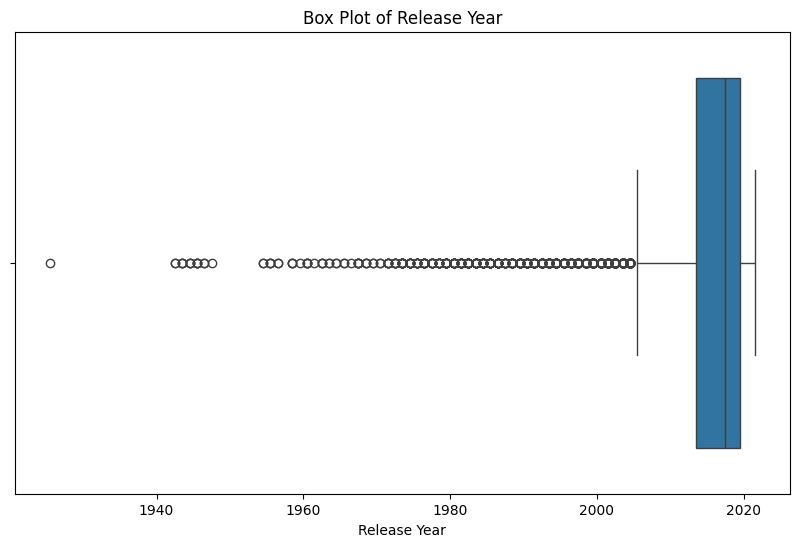

In [ ]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['release_year'])

# Add title and labels
plt.title('Box Plot of Release Year')
plt.xlabel('Release Year')

# Show the plot
plt.show()


In [5]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df[["title","director"]].sample(10)

,title,director
3369,BoJack Horseman,NaN
1335,The Sinner,NaN
4312,Back Street Girls -GOKUDOLS-,NaN
150,In Too Deep,Michael Rymer
6796,Freak Show,Trudie Styler
7891,Room on the Broom,"Max Lang, Jani Lachauer"
1611,Are You The One,NaN
3149,Zindagi Na Milegi Dobara,Zoya Akhtar
2831,Alakada Reloaded,Toyin Abraham
4455,Paan Singh Tomar,Tigmanshu Dhulia


In [11]:
# Define the URL from which to read the CSV file

url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

# Check for Nested directors
df[['title','director']].loc[df['title'] == "My Little Pony: A New Generation"]


,title,director
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha"


In [15]:
# Define the URL from which to read the CSV file
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

# Replace 'nan' with pd.NA
# Split strings by comma and convert to list, handling missing values
df['director'] = (df['director']
                  .replace('nan', pd.NA)
                  .apply(lambda x: str(x).split(', ') if pd.notna(x) else [pd.NA])
                  )

# Explode the DataFrame to separate each director into its own row
unnested_dir_df = (df[['title','director']]
                   .explode('director')
                   .reset_index(drop=True)
                   )

# unnested_df now contains each director in a separate row along with the corresponding title
unnested_dir_df

### Checks : ok!
# unnested_dir_df.loc[unnested_dir_df['title'] == "My Little Pony: A New Generation"]
# type(unnested_dir_df.iloc[8721]["director"])

pandas._libs.missing.NAType

In [ ]:
import pandas as pd

def data_quality_statistics(df):
    """
    This function takes a DataFrame as input and returns a DataFrame containing data quality statistics
    for each column in the DataFrame.

    Args:
      df: A Pandas DataFrame.

    Returns:
      A DataFrame containing data quality statistics for each column.
    """

    # Number of rows in the DataFrame
    num_rows = df.shape[0]

    # List to store statistics for each column
    stats = []

    # Iterate over columns
    for col in df.columns:
        # Number of unique values
        num_unique = df[col].nunique()

        # Number of duplicates
        num_duplicates = df.duplicated(subset=[col]).sum()

        # Number of NaN values
        num_nan = df[col].isnull().sum()

        # Percentage of NaN values
        pct_nan = (num_nan / num_rows) * 100 if num_rows > 0 else 0

        # Data type of the column
        data_type = df[col].dtype

        # Append statistics to the list
        stats.append({
            'Column': col,
            'Number of Rows': num_rows,
            'Number of Unique Values': num_unique,
            # 'Number of Duplicates': num_duplicates,
            'Number of NaN': num_nan,
            'Percentage of NaN': round(pct_nan, 2),
            'Data Type': data_type,
            # Add more statistics here if needed
        })

    # Convert list of dictionaries to DataFrame
    stats_df = pd.DataFrame(stats)

    return stats_df

# Example usage:
data_quality_statistics(df)


,Column,Number of Rows,Number of Unique Values,Number of NaN,Percentage of NaN,Data Type
0,show_id,8807,8807,0,0.00,object
1,type,8807,2,0,0.00,object
2,title,8807,8807,0,0.00,object
3,director,8807,4528,2634,29.91,object
4,cast,8807,7692,825,9.37,object
5,country,8807,748,831,9.44,object
6,date_added,8807,1714,10,0.11,datetime64[ns]
7,release_year,8807,74,0,0.00,datetime64[ns]
8,rating,8807,17,4,0.05,object
9,duration,8807,220,3,0.03,object


In [ ]:
data_quality_statistics(df)

,Column,Number of Rows,Number of Unique Values,Number of NaN,Percentage of NaN,Data Type
0,show_id,8807,8807,0,0.00,object
1,type,8807,2,0,0.00,object
2,title,8807,8807,0,0.00,object
3,director,8807,4528,2634,29.91,object
4,cast,8807,7692,825,9.37,object
5,country,8807,748,831,9.44,object
6,date_added,8807,1714,10,0.11,datetime64[ns]
7,release_year,8807,74,0,0.00,datetime64[ns]
8,rating,8807,17,4,0.05,object
9,duration,8807,220,3,0.03,object


In [ ]:
missing_values = df.isnull()
tidy = df.loc[~missing_values.any(axis=1)]
miss = df.loc[missing_values.any(axis=1)]

In [ ]:
tidy.shape

(5332, 12)

In [ ]:
miss.shape

(3475, 12)

In [ ]:
missing_values = df.isnull()
tidy = df.loc[~missing_values.any(axis=1)]
miss = df.loc[missing_values.any(axis=1)]

print(tidy.shape[0]) # No NaN in any Rows
print(miss.shape[0]) # At least 1 NaN in all Rows

5332
3475


In [ ]:
data_quality_statistics(miss)

,Column,Number of Rows,Number of Unique Values,Number of NaN,Percentage of NaN,Data Type
0,show_id,3475,3475,0,0.00,object
1,type,3475,2,0,0.00,object
2,title,3475,3475,0,0.00,object
3,director,3475,724,2634,75.80,object
4,cast,3475,2551,825,23.74,object
5,country,3475,255,831,23.91,object
6,date_added,3475,1159,10,0.29,datetime64[ns]
7,release_year,3475,54,0,0.00,datetime64[ns]
8,rating,3475,16,4,0.12,object
9,duration,3475,167,3,0.09,object


In [ ]:
# from the above "data_quality_statistics" we can obsere there are 225 unique coutries, which is leading to suspison.

url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df["country"].unique()[:100] #..Code(1)
# df["country"].value_counts() #..Code(2)

# we can see issues like
      # nan
      # 'United States' , 'United States, and United States'
      # Extra whitespace
      #  Some entries have multiple countries listed together separated by commas, example "Mexico, United States, Spain, Colombia" , "France, Senegal, Belgium" etc



array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [ ]:
import pandas as pd

url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"
df = pd.read_csv(url)

df["country"] = df["country"].fillna("").astype(str)
a=sorted(df["country"].unique())[:100]
print(len(df['country'].unique()))
# Split entries with multiple countries into separate rows
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

# Clean up country names
# The 'explode' function splits entries with multiple countries into separate rows.
# For example, if a row originally had 'United States, Canada', it would become two rows,
# one with 'United States' and another with 'Canada'.
# The 'split' function splits the string on commas, creating a list of countries.
# Then, 'explode' converts each item in the list into a separate row.
# This is necessary because each row should represent only one country.

# The following lines would strip leading and trailing whitespaces from country names.
# However, it seems that the data already has clean country names, so this step is unnecessary.
# df['country'] = df['country'].str.strip()

# Now, let's get the unique country names
# print(len(df['country'].unique()))

# df["country"] = df["country"].fillna("").astype(str)
# sorted(df["country"].unique())[:100]
# df["country"].value_counts() #..Code(2)\
# df["country"].isna()
a[:10]

749


['',
 ', France, Algeria',
 ', South Korea',
 'Argentina',
 'Argentina, Brazil, France, Poland, Germany, Denmark',
 'Argentina, Chile',
 'Argentina, Chile, Peru',
 'Argentina, France',
 'Argentina, France, United States, Germany, Qatar',
 'Argentina, Italy']

In [ ]:
df.show_id.nunique()

8807